# Comparison of Linear Regression Models

This notebook compares two linear regression models to predict real estate prices:
1. A model that incorporates zip codes as a predictor variable.
2. A model that is specific to a single zip code.

We aim to understand how the inclusion of geographic segmentation (zip codes) as a variable affects the model performance compared to a model trained on data from a specific zip code.


In [1]:
features = ['# Beds', '# Full Baths', '# Half Baths', '# Garage Spaces',
       'Year Built', 'Acres', 'SqFt', 'DOM', 'CDOM', 'Zip Code']

In [2]:
import pandas as pd
import numpy as np
from linear_model_funcs import *
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv')
df.head()


,#,Listing ID,St,MLS Area,Address,# Beds,# Full Baths,# Half Baths,# Garage Spaces,Levels,...,SqFt,List Price,LP$/SqFt,Close$/SqFt,Close Price,Close Date,DOM,CDOM,Zip Code,Type of Home
0,1,6996515,C,HU,21608 Wilmiller Ln,4,2,1,2.0,2,...,"2,581","$435,000",$168.54,$169.31,"$437,000",03/05/2024,4,4,78660,Single Family
1,1,1659174,C,PF,808 Whitehall Dr,3,2,0,2.0,1,...,"1,299","$275,000",$211.70,$184.76,"$240,000",12/29/2023,8,7,78660,Single Family
2,1,5349770,C,PF,16131 Stoneham Cir,3,2,0,1.0,1,...,"1,033","$265,000",$256.53,$242.01,"$250,000",11/14/2023,20,20,78660,Single Family
3,1,7256633,C,PF,17228 Sandwick Dr,3,2,0,2.0,1,...,"2,046","$235,000",$114.86,$123.66,"$253,000",01/30/2024,4,4,78660,Single Family
4,1,8113439,C,PF,15520 Sutton Leighs Ln,3,2,0,2.0,1,...,"1,616","$398,000",$246.29,$160.89,"$260,000",10/30/2023,48,48,78660,Single Family


In [3]:
# This is handled within the functions, so no need to load data here.
# Just an informational cell.
print("Data loading and cleaning functions are encapsulated within the model functions.")


Data loading and cleaning functions are encapsulated within the model functions.


In [4]:
# Model using zip codes as a predictor
model_with_zip, rmse_with_zip, r_squared_with_zip = get_model_with_zip()
print(f"Model with Zip Codes as Predictors: RMSE = {rmse_with_zip}, R-squared = {r_squared_with_zip}")


Model with Zip Codes as Predictors: RMSE = 299680.862751863, R-squared = 0.741782549839003


In [5]:
# # Extracting coefficients
# coefficients = model_with_zip.coef_ 
# print(coefficients)

# # Creating the bar chart
# plt.figure(figsize=(10, 5))
# plt.bar(features, coefficients, color='blue')
# plt.xlabel('Features')
# plt.ylabel('Coefficient Value')
# plt.title('Impact of Each Factor on House Price')
# plt.xticks(rotation=45)
# plt.show()

In [6]:
zips = df['Zip Code'].unique()

In [7]:
df['Zip Code'].value_counts()

Zip Code
78660    517
78642    455
78666    408
78620    232
78744    206
78664    166
78746     99
78701     61
78758     30
Name: count, dtype: int64

In [8]:
# Model for a specific zip code (e.g., 78660)
zrsdic = {}
rslist = []
for zip in zips:
    zip_code = zip
    print(zip)
    model_for_zip, rmse_for_zip, r_squared_for_zip, scaler = get_model_for_zip(zip_code)
    print(f"Model for Zip Code {zip_code}: RMSE = {rmse_for_zip}, R-squared = {r_squared_for_zip}")
    if r_squared_for_zip is not None:
        rslist.append(r_squared_for_zip)
        zrsdic[zip] = r_squared_for_zip , df[df['Zip Code'] == zip].shape[0]


78660
Model for Zip Code 78660: RMSE = 50434.81456238636, R-squared = 0.8612876899489141
78744
Model for Zip Code 78744: RMSE = 74245.29666152838, R-squared = 0.7100305832826368
78746
Model for Zip Code 78746: RMSE = 1161559.8027745695, R-squared = 0.030885039141144377
78701
No data available for ZIP code 78701 with Single Family homes.
Model for Zip Code 78701: RMSE = None, R-squared = None
78642
Model for Zip Code 78642: RMSE = 89341.87605586991, R-squared = 0.8644930704995545
78666
Model for Zip Code 78666: RMSE = 78197.0464721563, R-squared = 0.8404992480766528
78664
Model for Zip Code 78664: RMSE = 70680.82703230897, R-squared = 0.5135521001511464
78758
No data available for ZIP code 78758 with Single Family homes.
Model for Zip Code 78758: RMSE = None, R-squared = None
78620
Model for Zip Code 78620: RMSE = 341923.4142503511, R-squared = 0.6603689826358657


In [9]:
zrsdic

{78660: (0.8612876899489141, 517),
 78744: (0.7100305832826368, 206),
 78746: (0.030885039141144377, 99),
 78642: (0.8644930704995545, 455),
 78666: (0.8404992480766528, 408),
 78664: (0.5135521001511464, 166),
 78620: (0.6603689826358657, 232)}

In [10]:
zrdf = pd.DataFrame.from_dict(zrsdic, orient='index', columns=['R-squared', 'Count'])
zrdf = zrdf.sort_values(by='R-squared', ascending=False)
zrdf.head(10)

,R-squared,Count
78642,0.864493,455
78660,0.861288,517
78666,0.840499,408
78744,0.710031,206
78620,0.660369,232
78664,0.513552,166
78746,0.030885,99


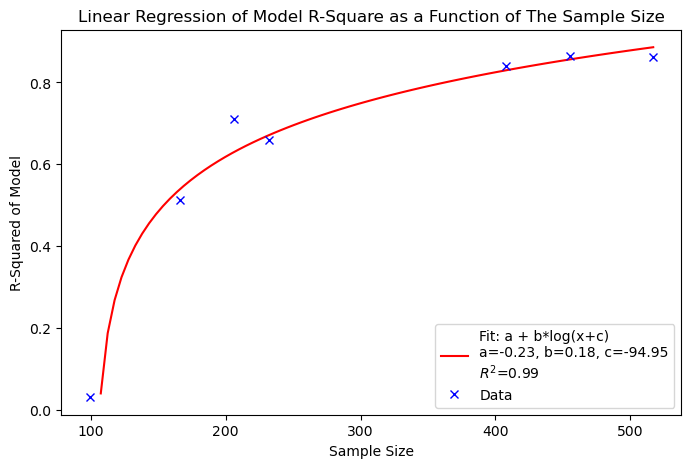

In [11]:

cs = [] # initialize list of sample sizes
rs = [] # initialize list of R-squared values
for zip in zrsdic.keys():
    cs.append(df[df['Zip Code'] == zip].shape[0])
    rs.append(zrsdic[zip][0])


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Logarithmic function to fit
def log_func(x, a, b, c):
    return a + b * np.log(x+c)

# Fit the model
popt, pcov = curve_fit(log_func, cs, rs)

# Predicted values from the fit
rs_pred = log_func(cs, *popt)

# R-squared value
r_squared = r2_score(rs, rs_pred)

# Plotting
plt.figure(figsize=(8, 5))
x, y = np.linspace(10, max(cs), 100), log_func(np.linspace(0, max(cs), 100), *popt)
plt.plot(x, y, color='red', label=f'Fit: a + b*log(x+c)\na={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}\n$R^2$={r_squared:.2f}')
plt.plot(cs, rs,'x',color='blue', label='Data')
plt.xlabel('Sample Size')
plt.ylabel('R-Squared of Model')
plt.title('Linear Regression of Model R-Square as a Function of The Sample Size')
plt.legend()
plt.savefig('linear_model_img/Linear Regression of Model R-Square as a Function of The Sample Size.png', dpi = 300)
plt.show()



In [12]:
url = 'https://www.zillow.com/homedetails/13509-Clerk-St-Pflugerville-TX-78660/331621525_zpid/'

# Data from the Zillow listing
listing_data = {
    '# Beds': [4],  
    '# Full Baths': [2],  
    '# Half Baths': [1],
    '# Garage Spaces': [2],
    'Year Built': [2019],
    'Acres': [0.1399],
    'SqFt': [2603], 
    'DOM':[2],
    'CDOM':[2],
    'Zip Code': [78660] 
}

# Convert listing data to DataFrame
df_listing = pd.DataFrame(listing_data)

# Convert listing data to DataFrame
df_listing = pd.DataFrame(listing_data)

# Load your model for the specific zip code
model, rmse, r_squared, scaler = get_model_for_zip(78660)

# Check if the model is valid (i.e., training was successful)
if model is not None:
    # Apply the same scaling to the new data
    df_listing_scaled = scaler.transform(df_listing)

    # Predict the price using the model
    predicted_price = model.predict(df_listing_scaled)

    # Assuming the list price is also available
    list_price = 450000  # Example list price

    # Output comparison
    print(f"List Price: ${list_price}")
    print(f"Predicted Price: ${predicted_price[0]:.2f}")
    print(f"Difference: ${predicted_price[0] - list_price:.2f}")
else:
    print("No model available for this zip code, or insufficient data to train model.")

List Price: $450000
Predicted Price: $469893.48
Difference: $19893.48


In [13]:
    url = 'https://www.zillow.com/homedetails/21412-Windmill-Ranch-Ave-Pflugerville-TX-78660/145655853_zpid/?'

    # Data from the Zillow listing
    listing_data = {
        '# Beds': [4],  
        '# Full Baths': [2],  
        '# Half Baths': [1],
        '# Garage Spaces': [2],
        'Year Built': [2015],
        'Acres': [0.26],
        'SqFt': [2834], 
        'DOM':[293],
        'CDOM':[293],
        'Zip Code': [78660] 
    }

    # Convert listing data to DataFrame
    df_listing = pd.DataFrame(listing_data)

    # Convert listing data to DataFrame
    df_listing = pd.DataFrame(listing_data)

    # Load your model for the specific zip code
    model, rmse, r_squared, scaler = get_model_for_zip(78660)

    # Check if the model is valid (i.e., training was successful)
    if model is not None:
    # Apply the same scaling to the new data
        df_listing_scaled = scaler.transform(df_listing)

        # Predict the price using the model
        predicted_price = model.predict(df_listing_scaled)

        # Assuming the list price is also available
        list_price = 499999  # Example list price

        # Output comparison
        print(f"List Price: ${list_price}")
        print(f"Predicted Price: ${predicted_price[0]:.2f}")
        print(f"Difference: ${predicted_price[0] - list_price:.2f}")
    else:
        print("No model available for this zip code, or insufficient data to train model.")

List Price: $499999
Predicted Price: $490312.60
Difference: $-9686.40


In [14]:
model.coef_

array([-3462.34310923, 23734.66986229, -3656.44845256, 11512.33796507,
       15233.65077518, 28297.5418005 , 74878.75957439,  3366.33597531,
       -7297.49559765,     0.        ])

In [15]:
url = 'https://www.zillow.com/homedetails/1209-Vapor-Dr-Pflugerville-TX-78660/29453080_zpid/'

# Data from the Zillow listing
listing_data = {
    '# Beds': [6],  
    '# Full Baths': [4],  
    '# Half Baths': [0],
    '# Garage Spaces': [6],
    'Year Built': [1978],
    'Acres': [1.1],
    'SqFt': [2863], 
    'DOM':[1],
    'CDOM':[1],
    'Zip Code': [78660] 
}

# Convert listing data to DataFrame
df_listing = pd.DataFrame(listing_data)

# Convert listing data to DataFrame
df_listing = pd.DataFrame(listing_data)

# Load your model for the specific zip code
model, rmse, r_squared, scaler = get_model_for_zip(78660)

# Check if the model is valid (i.e., training was successful)
if model is not None:
    # Apply the same scaling to the new data
    df_listing_scaled = scaler.transform(df_listing)

    # Predict the price using the model
    predicted_price = model.predict(df_listing_scaled)

    # Assuming the list price is also available
    list_price = 899999  # Example list price

    # Output comparison
    print(f"List Price: ${list_price}")
    print(f"Predicted Price: ${predicted_price[0]:.2f}")
    print(f"Difference: ${predicted_price[0] - list_price:.2f}")
else:
    print("No model available for this zip code, or insufficient data to train model.")

List Price: $899999
Predicted Price: $731849.26
Difference: $-168149.74


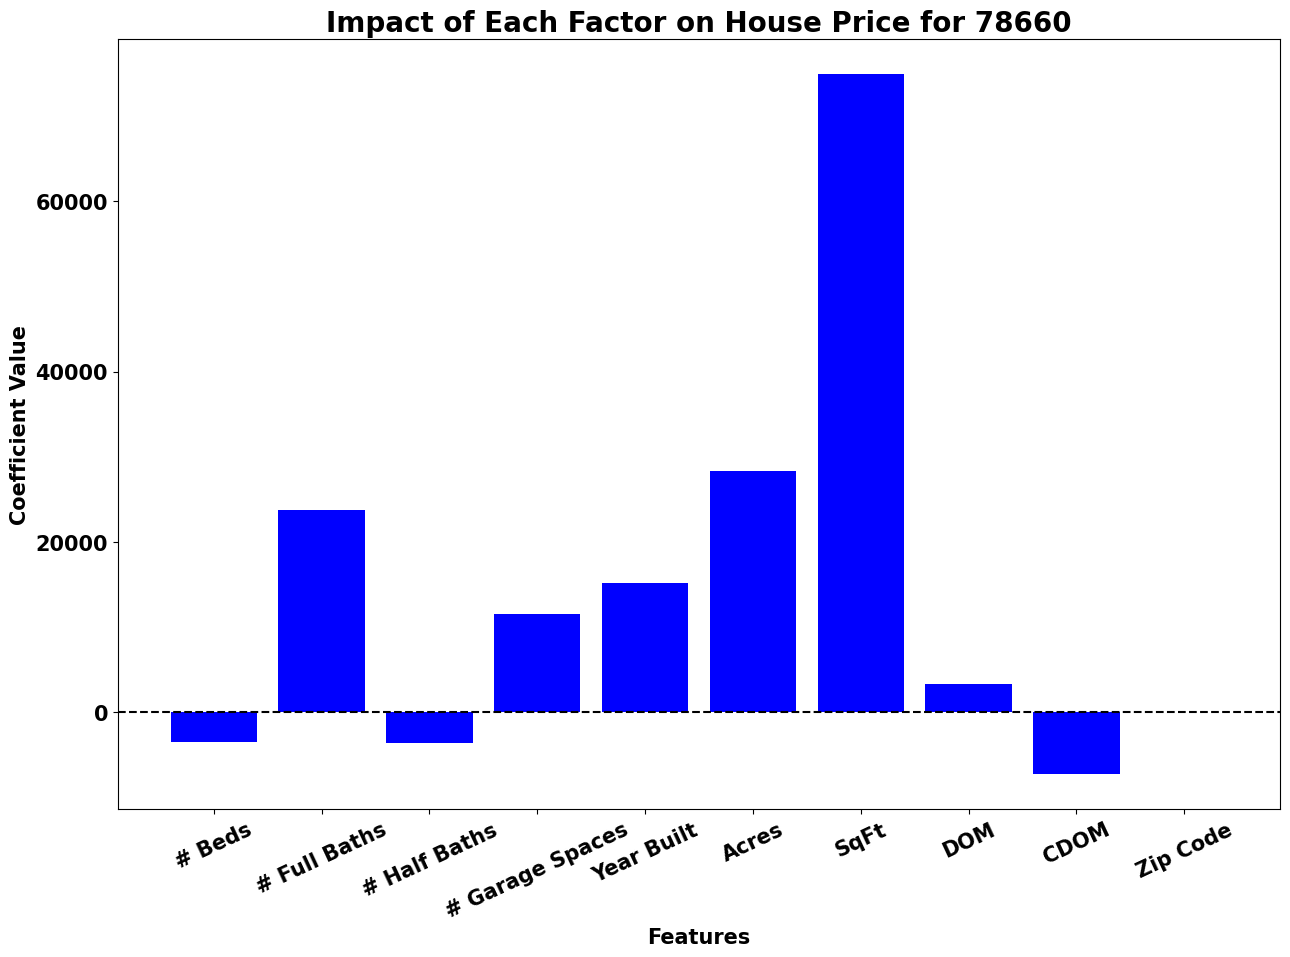

In [16]:
# Extracting coefficients
coefficients = model.coef_ 

# Creating the bar chart
plt.figure(figsize=(15, 10))
plt.bar(features, coefficients, color='blue')
plt.xlabel('Features', fontsize=15, weight='bold')
plt.ylabel('Coefficient Value', fontsize=15, weight='bold')
plt.title('Impact of Each Factor on House Price for 78660', fontsize=20, weight='bold')
plt.xticks(rotation=25, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.axhline(y=0, color='black', linestyle='--')
plt.savefig('linear_model_img/Impact of Each Factor on House Price for 78660.png', dpi = 300)
plt.show()

## Model Comparison Results

The comparison of the two models indicates the following:
- **Model with Zip Codes as Predictors**:
  - RMSE: `rmse_with_zip`
  - R-squared: `r_squared_with_zip`
- **Model for Specific Zip Code (78660)**:
  - RMSE: `rmse_for_zip`
  - R-squared: `r_squared_for_zip`

From these results, we can observe that (provide a brief analysis based on the RMSE and R-squared values).


## Conclusion

This analysis provides insight into how the scope of training data, either generalized or specific, influences the performance of predictive modeling in real estate. Depending on the results, we can conclude whether broader geographic factors or local specificity is more predictive of real estate prices in our models.


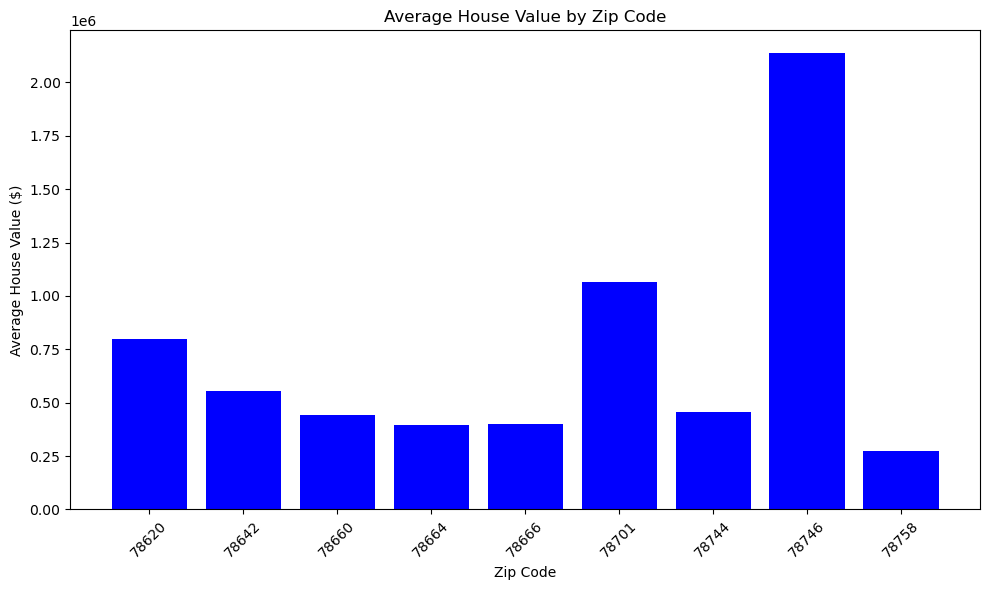

In [17]:
def plot_mean_house_values(filepath):
    # Load and clean your data
    data = load_and_clean_data(filepath)
    
    # Calculate mean house values for each zip code
    mean_values = data.groupby('Zip Code')['Close Price'].mean().reset_index()
    
    # Sort data by Zip Code for better visualization (optional)
    mean_values.sort_values('Zip Code', inplace=True)
    
    # Plotting the mean house values
    plt.figure(figsize=(10, 6))
    plt.bar(mean_values['Zip Code'].astype(str), mean_values['Close Price'], color='blue')
    plt.xlabel('Zip Code')
    plt.ylabel('Average House Value ($)')
    plt.title('Average House Value by Zip Code')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()

# Example usage:
plot_mean_house_values('data.csv')

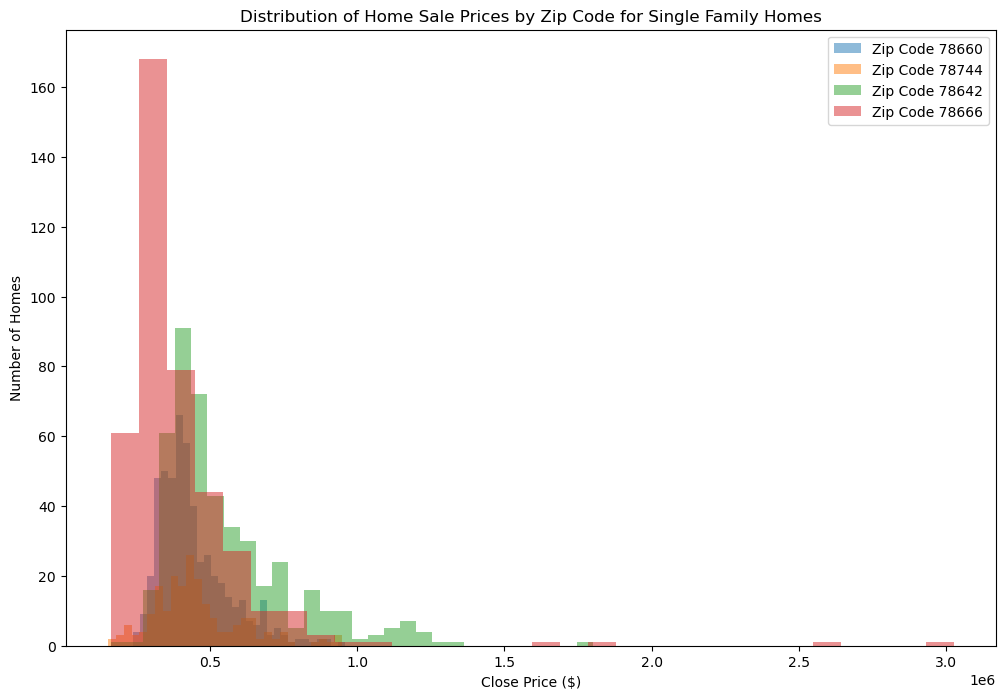

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_overlapping_histograms(filepath):
    # Load and clean your data
    data = load_and_clean_data(filepath)
    
    # Define the list of specific zip codes of interest
    specific_zip_codes = [78642, 78660, 78666, 78744]
    
    # Filter the data to include only single-family homes in the specific zip codes
    filtered_data = data[(data['Type of Home'] == 'Single Family') & (data['Zip Code'].isin(specific_zip_codes))]
    
    # Get a list of unique zip codes that have single family homes and are within the specified list
    zip_codes = filtered_data['Zip Code'].unique()
    
    # Prepare the plot
    plt.figure(figsize=(12, 8))
    
    # Loop through each zip code and plot the histogram
    for zip_code in zip_codes:
        subset = filtered_data[filtered_data['Zip Code'] == zip_code]
        # Make sure the subset is not empty
        if not subset.empty:
            plt.hist(subset['Close Price'], bins=30, alpha=0.5, label=f'Zip Code {zip_code}')
    
    plt.xlabel('Close Price ($)')
    plt.ylabel('Number of Homes')
    plt.title('Distribution of Home Sale Prices by Zip Code for Single Family Homes')
    plt.legend()  # Add a legend to show which histogram corresponds to which zip code
    plt.show()

# Example usage:
plot_overlapping_histograms('data.csv')
